# **Predict Power Plant Energy Output in R**


## **Project Description**
Attempt to predict Power plant energy output using various regression models like Multiple Linear Regression, Polynomial Linear Regression, Support Vector Regression (SVR), Decision Tree Regression and Random Forest Regression. 

## **Data Set Information:**
The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.

### **Attribute Information:**
Features consist of hourly average ambient variables:

* Temperature (T) in the range 1.81°C and 37.11°C,
* Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
* Relative Humidity (RH) in the range 25.56% to 100.16%
* Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
* Net hourly electrical energy output (EP) 420.26-495.76 MW

## **Data Preprocessing**

### **Importing the dataset**

In [1]:
ds = read.csv('/content/Power Plant Data.csv')
cat("First three rows of dataset", "\n")
head(ds, 3)

First three rows of dataset 


,AT,V,AP,RH,PE
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14.96,41.76,1024.07,73.17,463.26
2,25.18,62.96,1020.04,59.08,444.37
3,5.11,39.40,1012.16,92.14,488.56


In [2]:
#find number of rows with missing values
sum(!complete.cases(ds))

[1] 0

### **Splitting the dataset into the Train set and Test set**

In [3]:
install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(ds$PE, SplitRatio = 4/5)
head(split)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1]  TRUE  TRUE  TRUE FALSE FALSE  TRUE

In [4]:
train_set = subset(ds, split == TRUE)
test_set = subset(ds, split == FALSE)
print(head(train_set,5))

     AT     V      AP    RH     PE
1 14.96 41.76 1024.07 73.17 463.26
2 25.18 62.96 1020.04 59.08 444.37
3  5.11 39.40 1012.16 92.14 488.56
6 26.27 59.44 1012.23 58.77 443.67
7 15.89 43.96 1014.02 75.24 467.35


In [5]:
print(head(test_set,3))

     AT     V      AP    RH     PE
4 20.86 57.32 1010.24 76.64 446.48
5 10.82 37.50 1009.23 96.62 473.90
8  9.48 44.71 1019.12 66.43 478.42


## **Multiple Linear Regression**

In [6]:
# Fitting Multiple Linear Regression to the Training set
regressor = lm(formula = PE ~ .,
               data = train_set)

# Predicting the Test set results
y_pred = predict(regressor, newdata = test_set)
head(y_pred)

4        5        8       11       16       20 
450.5647 471.9209 478.1966 459.6331 458.2768 472.3271

In [7]:
summary(regressor)


Call:
lm(formula = PE ~ ., data = train_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-43.081  -3.145  -0.083   3.148  17.801 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 462.198326  10.867285   42.53  < 2e-16 ***
AT           -1.981035   0.017051 -116.18  < 2e-16 ***
V            -0.236547   0.008129  -29.10  < 2e-16 ***
AP            0.054833   0.010545    5.20 2.04e-07 ***
RH           -0.158473   0.004664  -33.98  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.563 on 7649 degrees of freedom
Multiple R-squared:  0.9288,	Adjusted R-squared:  0.9288 
F-statistic: 2.496e+04 on 4 and 7649 DF,  p-value: < 2.2e-16


In [8]:
summary(regressor)$r.squared

[1] 0.928832

**Backward Elimination**

Actually, no need for backward elimination. All variable are highly significant as noted from their p-values. Still just for the sake of trying, 

In [9]:
#Removing the least significant variable from the model
regressor = lm(formula = PE ~ AT + V  + RH, data = train_set)
summary(regressor)


Call:
lm(formula = PE ~ AT + V + RH, data = train_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-43.134  -3.133  -0.078   3.126  18.036 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 518.663821   0.434869 1192.69   <2e-16 ***
AT           -2.017221   0.015593 -129.37   <2e-16 ***
V            -0.231562   0.008086  -28.64   <2e-16 ***
RH           -0.164811   0.004509  -36.55   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.571 on 7650 degrees of freedom
Multiple R-squared:  0.9286,	Adjusted R-squared:  0.9286 
F-statistic: 3.315e+04 on 3 and 7650 DF,  p-value: < 2.2e-16


**Both R-squared and Adjusted R- squared got affected by eliminating one of the significant variables.**

## **Polynomial Regression**

In [10]:
# Fitting Polynomial Regression to the dataset
poly_reg = lm(PE ~ poly(AT, degree=4, raw=TRUE) + 
              poly(V, degree=4, raw=TRUE) + 
              poly(RH, degree=4, raw=TRUE) +
              poly(AP, degree=4, raw=TRUE), data = train_set)
summary(poly_reg)


Call:
lm(formula = PE ~ poly(AT, degree = 4, raw = TRUE) + poly(V, 
    degree = 4, raw = TRUE) + poly(RH, degree = 4, raw = TRUE) + 
    poly(AP, degree = 4, raw = TRUE), data = train_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-45.639  -2.844   0.037   2.941  18.191 

Coefficients: (1 not defined because of singularities)
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        4.747e+05  1.002e+05   4.737 2.21e-06 ***
poly(AT, degree = 4, raw = TRUE)1 -1.468e+00  3.283e-01  -4.470 7.93e-06 ***
poly(AT, degree = 4, raw = TRUE)2 -8.208e-02  3.005e-02  -2.732  0.00632 ** 
poly(AT, degree = 4, raw = TRUE)3  3.001e-03  1.113e-03   2.696  0.00703 ** 
poly(AT, degree = 4, raw = TRUE)4 -2.459e-05  1.443e-05  -1.704  0.08837 .  
poly(V, degree = 4, raw = TRUE)1  -1.327e+00  1.313e+00  -1.010  0.31242    
poly(V, degree = 4, raw = TRUE)2   5.551e-02  3.745e-02   1.482  0.13827    
poly(V, degree = 4, raw = TRUE)3  -9.753e-0

In [11]:
y_pred = predict(poly_reg, newdata = test_set)
print(head(y_pred))

Warning message in predict.lm(poly_reg, newdata = test_set):
“prediction from a rank-deficient fit may be misleading”


       4        5        8       11       16       20 
449.0553 472.3497 479.6516 458.4846 456.0952 471.4408 


**Eliminating fourth power of AP,**

In [12]:
# Fitting Polynomial Regression to the dataset
poly_reg = lm(PE ~ poly(AT, degree=4, raw=TRUE) + 
              poly(V, degree=4, raw=TRUE) + 
              poly(RH, degree=4, raw=TRUE) +
              poly(AP, degree=3, raw=TRUE), data = train_set)
summary(poly_reg)


Call:
lm(formula = PE ~ poly(AT, degree = 4, raw = TRUE) + poly(V, 
    degree = 4, raw = TRUE) + poly(RH, degree = 4, raw = TRUE) + 
    poly(AP, degree = 3, raw = TRUE), data = train_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-45.639  -2.844   0.037   2.941  18.191 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        4.747e+05  1.002e+05   4.737 2.21e-06 ***
poly(AT, degree = 4, raw = TRUE)1 -1.468e+00  3.283e-01  -4.470 7.93e-06 ***
poly(AT, degree = 4, raw = TRUE)2 -8.208e-02  3.005e-02  -2.732  0.00632 ** 
poly(AT, degree = 4, raw = TRUE)3  3.001e-03  1.113e-03   2.696  0.00703 ** 
poly(AT, degree = 4, raw = TRUE)4 -2.459e-05  1.443e-05  -1.704  0.08837 .  
poly(V, degree = 4, raw = TRUE)1  -1.327e+00  1.313e+00  -1.010  0.31242    
poly(V, degree = 4, raw = TRUE)2   5.551e-02  3.745e-02   1.482  0.13827    
poly(V, degree = 4, raw = TRUE)3  -9.753e-04  4.645e-04  -2.100  0.03579 *  
poly(V,

In [13]:
y_pred = predict(poly_reg, newdata = test_set)
print(head(y_pred))

       4        5        8       11       16       20 
449.0553 472.3497 479.6516 458.4846 456.0952 471.4408 


In [14]:
# Fitting Polynomial Regression to the dataset
poly_reg = lm(PE ~ poly(AT, degree=3, raw=TRUE) + 
              poly(V, degree=3, raw=TRUE) + 
              poly(RH, degree=3, raw=TRUE) +
              poly(AP, degree=3, raw=TRUE), data = train_set)
summary(poly_reg)


Call:
lm(formula = PE ~ poly(AT, degree = 3, raw = TRUE) + poly(V, 
    degree = 3, raw = TRUE) + poly(RH, degree = 3, raw = TRUE) + 
    poly(AP, degree = 3, raw = TRUE), data = train_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-45.857  -2.810   0.041   2.947  18.378 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        4.700e+05  1.003e+05   4.688 2.81e-06 ***
poly(AT, degree = 3, raw = TRUE)1 -2.003e+00  1.218e-01 -16.450  < 2e-16 ***
poly(AT, degree = 3, raw = TRUE)2 -3.059e-02  7.077e-03  -4.323 1.56e-05 ***
poly(AT, degree = 3, raw = TRUE)3  1.082e-03  1.233e-04   8.771  < 2e-16 ***
poly(V, degree = 3, raw = TRUE)1   2.046e+00  3.017e-01   6.783 1.26e-11 ***
poly(V, degree = 3, raw = TRUE)2  -4.251e-02  5.458e-03  -7.789 7.67e-15 ***
poly(V, degree = 3, raw = TRUE)3   2.523e-04  3.234e-05   7.803 6.86e-15 ***
poly(RH, degree = 3, raw = TRUE)1  2.454e-01  1.486e-01   1.652   0.0987 .  
poly(RH

Adjusted R-squared is slightly decreased by removing 4th power. 

Polynomials can be defined manually using the I function. For example a polynomial of degree 3 for AT will be

lm(PE ~ AT1 + I(AT^2) + I(AT1^3))

In [15]:
y_pred = predict(poly_reg, newdata = test_set)
print(head(y_pred))

       4        5        8       11       16       20 
449.0023 472.4759 479.5906 458.6739 456.0222 471.4390 


## **Support Vector Regression (SVR)**

In [16]:
install.packages('e1071')
library (e1071)
regressor = svm(formula = PE ~., data = train_set, type = "eps-regression")
y_pred = predict(regressor, newdata = test_set)
print(head(y_pred))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



       4        5        8       11       16       20 
448.5819 475.6905 480.0130 457.7658 458.1210 470.2541 


In [17]:
summary(regressor)


Call:
svm(formula = PE ~ ., data = train_set, type = "eps-regression")


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.25 
    epsilon:  0.1 


Number of Support Vectors:  4934






In [18]:
summary(regressor)$r.squared

NULL

**Metrics**

In [19]:
d = test_set$PE-y_pred
mse = mean((d)^2)
mae = mean(abs(d))
rmse = sqrt(mse)
R2 = 1-(sum((d)^2)/sum((test_set$PE-mean(test_set$PE))^2))

cat(" MAE:", mae, "\n", "MSE:", mse, "\n", 
    "RMSE:", rmse, "\n", "R-squared:", R2)

 MAE: 3.026874 
 MSE: 15.82778 
 RMSE: 3.978414 
 R-squared: 0.9447932

In [20]:
library(lattice)
library(ggplot2)
install.packages('hydroGOF')
library(hydroGOF)
mae = mae(y_pred, test_set$PE)
mse = mse(y_pred, test_set$PE)
install.packages('caret')
library(caret)
rmse = RMSE(y_pred, test_set$PE)
R2 = R2(y_pred, test_set$PE, form = "traditional")
cat(" MAE:", mae, "\n", "MSE:", mse, "\n", 
    "RMSE:", rmse, "\n", "R-squared:", R2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


 MAE: 3.026874 
 MSE: 15.82778 
 RMSE: 3.978414 
 R-squared: 0.9447932

In [21]:
## RMSE Calculation for linear model

#Install Package
#install.packages("hydroGOF")

#Load Library
library(hydroGOF)

#Calculate RMSE 
RMSE=rmse(y_pred,test_set$PE)
RMSE

[1] 3.978414

In [22]:
library(hydroGOF)
mae(y_pred, test_set$PE)

[1] 3.026874

In [23]:
mse(y_pred, test_set$PE)

[1] 15.82778

### **Correlation, Variance and Covariance**

In [24]:
cor(y_pred, test_set$PE)

[1] 0.9722419

In [25]:
cov(y_pred, test_set$PE)

[1] 276.8067

In [26]:
var(y_pred, test_set$PE)

[1] 276.8067

In [27]:
#br2 is Coefficient of determination (r2) multiplied by the slope of the regression line
library(hydroGOF)
br2(y_pred, test_set$PE)

[1] 0.9450538

## **Decision Tree Regression**

### **Fitting Decision Tree Regression to the dataset**

In [28]:
install.packages('rpart')
library(rpart)
regressor = rpart(formula = PE ~., data = train_set)
summary(regressor)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Call:
rpart(formula = PE ~ ., data = train_set)
  n= 7654 

          CP nsplit rel error    xerror        xstd
1 0.72316552      0 1.0000000 1.0004827 0.011075379
2 0.07103671      1 0.2768345 0.2801957 0.004271594
3 0.06809552      2 0.2057978 0.2142886 0.003626186
4 0.02213194      3 0.1377023 0.1418859 0.002641777
5 0.01000000      4 0.1155703 0.1201071 0.002427519

Variable importance
AT  V AP RH 
44 32 14  9 

Node number 1: 7654 observations,    complexity param=0.7231655
  mean=454.387, MSE=292.3878 
  left son=2 (4506 obs) right son=3 (3148 obs)
  Primary splits:
      AT < 17.775   to the right, improve=0.7231655, (0 missing)
      V  < 46.195   to the right, improve=0.6934418, (0 missing)
      AP < 1014.815 to the left,  improve=0.2216744, (0 missing)
      RH < 68.685   to the left,  improve=0.1158372, (0 missing)
  Surrogate splits:
      V  < 46.195   to the right, agree=0.913, adj=0.789, (0 split)
      AP < 1014.965 to the left,  agree=0.731, adj=0.345, (0 split)
     

In [29]:
y_pred = predict(regressor, newdata = test_set)
print(head(y_pred))

       4        5        8       11       16       20 
450.9624 479.3278 479.3278 450.9624 450.9624 465.3669 


**Metrics**

In [30]:
d = test_set$PE-y_pred
mse = mean((d)^2)
mae = mean(abs(d))
rmse = sqrt(mse)
R2 = 1-(sum((d)^2)/sum((test_set$PE-mean(test_set$PE))^2))

cat(" MAE:", mae, "\n", "MSE:", mse, "\n", 
    "RMSE:", rmse, "\n", "R-squared:", R2)

 MAE: 4.491559 
 MSE: 33.32614 
 RMSE: 5.77288 
 R-squared: 0.8837594

## **Random Forest Regression**

### **Fitting Random Forest Regression to the dataset**

In [31]:
install.packages("randomForest")
library(randomForest)
set.seed(1234) # to get the same set of results
#regressor = randomForest(x = ds[1], y = ds$PE,ntree = 10) # to make it a vector
regressor = randomForest(formula = PE ~ ., data = train_set, ntree = 500, metric = 'rmse')
summary(regressor)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




                Length Class  Mode     
call               5   -none- call     
type               1   -none- character
predicted       7654   -none- numeric  
mse              500   -none- numeric  
rsq              500   -none- numeric  
oob.times       7654   -none- numeric  
importance         4   -none- numeric  
importanceSD       0   -none- NULL     
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            11   -none- list     
coefs              0   -none- NULL     
y               7654   -none- numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     

In [32]:
print(regressor)


Call:
 randomForest(formula = PE ~ ., data = train_set, ntree = 500,      metric = "rmse") 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 11.192
                    % Var explained: 96.17


In [33]:
y_pred = predict(regressor, newdata = test_set)
print(head(y_pred))

       4        5        8       11       16       20 
447.7088 472.8718 478.4940 454.4067 460.3786 467.6263 


In [34]:
#find number of trees that produce lowest test MSE
which.min(regressor$mse)

[1] 392

In [35]:
#find RMSE of best model
sqrt(regressor$mse[which.min(regressor$mse)]) 

[1] 3.344645

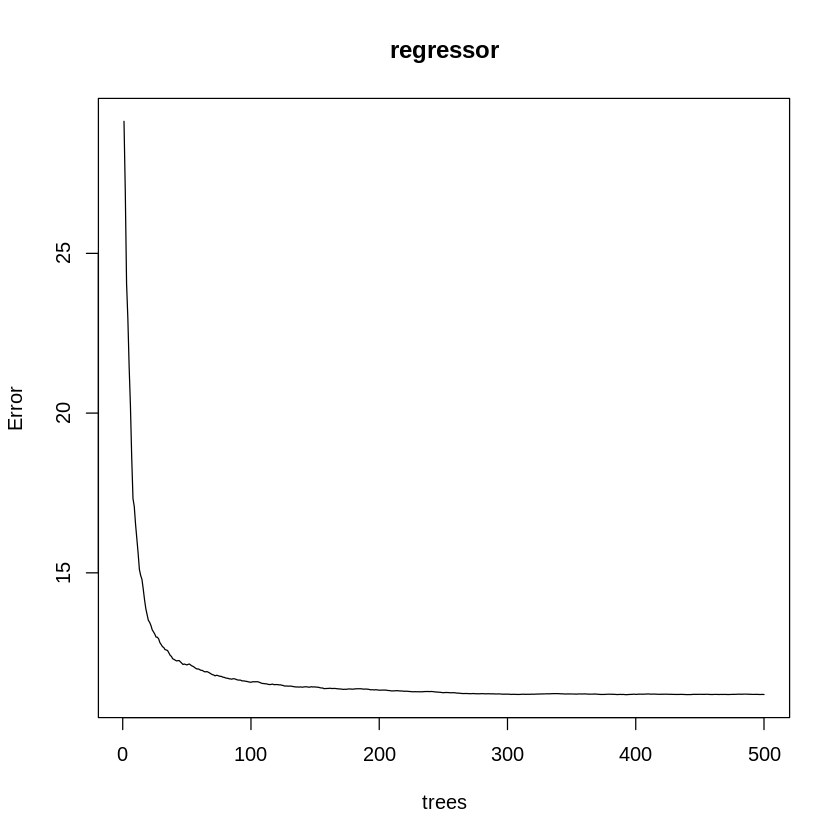

In [36]:
#plot the test MSE by number of trees
plot(regressor)

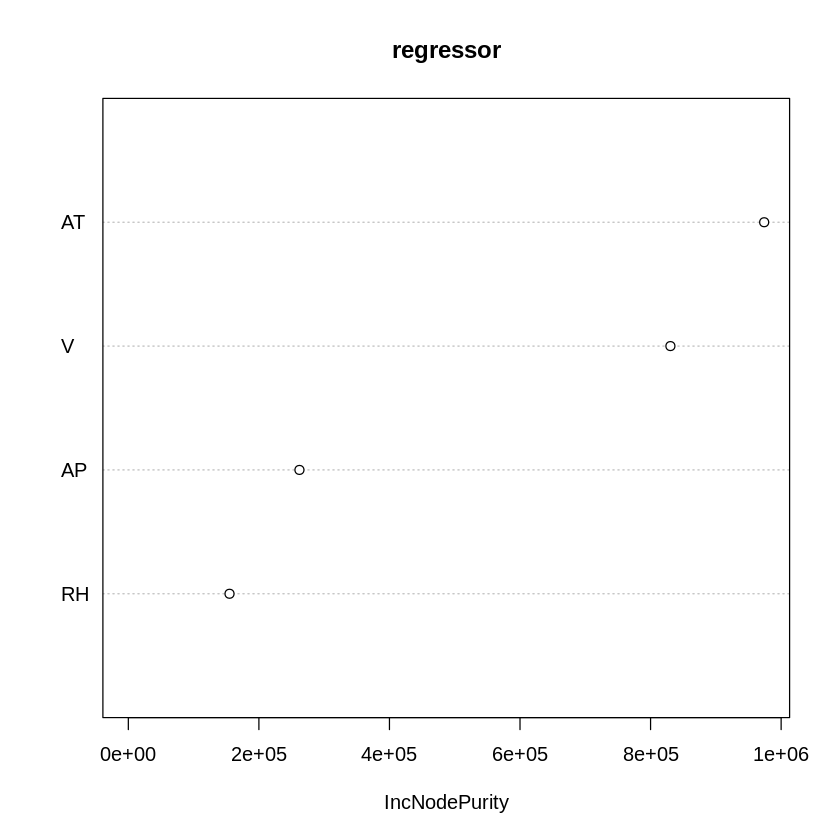

In [37]:
#produce variable importance plot
varImpPlot(regressor) 

The x-axis displays the average increase in node purity of the regression trees based on splitting on the various predictors displayed on the y-axis.

From the plot we can see that Temperature (AT) is the most important predictor variable, followed closely by exhaust vaccum (V)

0.02116601 0.01 
0.03403377 0.01 


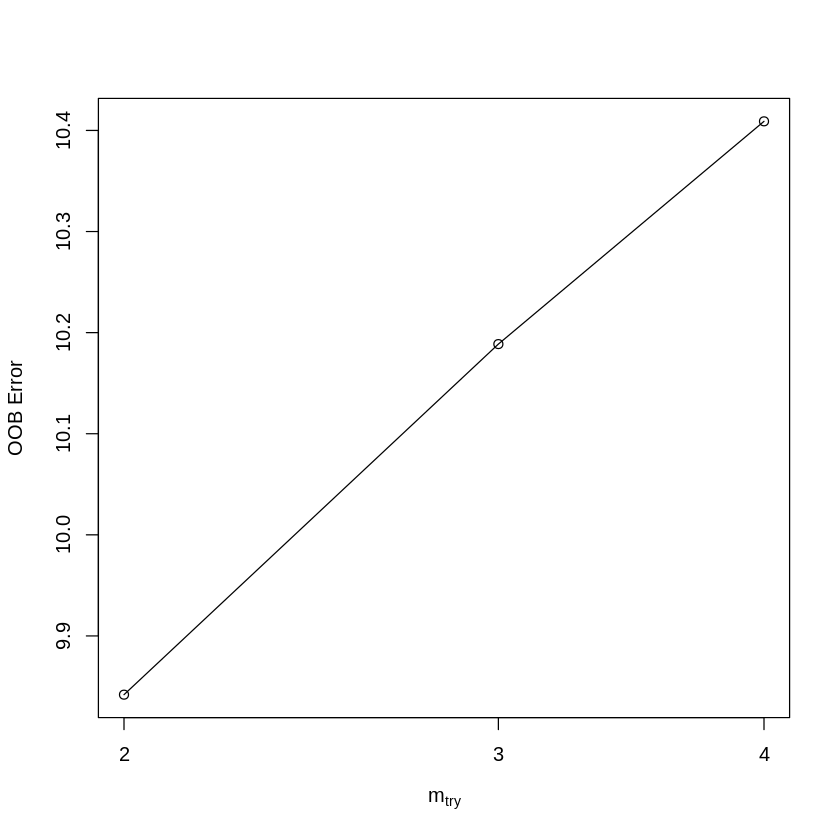

In [38]:
model_tuned <- tuneRF(
               x=ds[,1:4], #define predictor variables
               y=ds[,5], #define response variable
               ntreeTry=500,
               mtryStart=4, 
               stepFactor=1.5,
               improve=0.01,
               trace=FALSE #don't show real-time progress
               )

This function produces the following plot, which displays the number of predictors used at each split when building the trees on the x-axis and the out-of-bag estimated error on the y-axis:

It can be seen that the lowest OOB error is achieved by using 2 randomly chosen predictors at each split when building the trees.

**Metrics**

In [39]:
library(lattice)
library(ggplot2)
mae = mae(y_pred, test_set$PE)
mse = mse(y_pred, test_set$PE)
library(caret)
rmse = RMSE(y_pred, test_set$PE)
R2 = R2(y_pred, test_set$PE, form = "traditional")
cat(" MAE:", mae, "\n", "MSE:", mse, "\n", 
    "RMSE:", rmse, "\n", "R-squared:", R2)

 MAE: 2.418226 
 MSE: 11.15312 
 RMSE: 3.339629 
 R-squared: 0.9610983

In [40]:
d = test_set$PE-y_pred
mse = mean((d)^2)
mae = mean(abs(d))
rmse = sqrt(mse)
R2 = 1-(sum((d)^2)/sum((test_set$PE-mean(test_set$PE))^2))

cat(" MAE:", mae, "\n", "MSE:", mse, "\n", 
    "RMSE:", rmse, "\n", "R-squared:", R2)

 MAE: 2.418226 
 MSE: 11.15312 
 RMSE: 3.339629 
 R-squared: 0.9610983

**Building a random forest model with exact number of trees that produce lowest test MSE**

In [41]:
install.packages("randomForest")
library(randomForest)
set.seed(1234) # to get the same set of results
#regressor = randomForest(x = ds[1], y = ds$PE,ntree = 10) # to make it a vector
regressor = randomForest(formula = PE ~ ., data = train_set, ntree = 392, metric = 'rmse')
summary(regressor)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



                Length Class  Mode     
call               5   -none- call     
type               1   -none- character
predicted       7654   -none- numeric  
mse              392   -none- numeric  
rsq              392   -none- numeric  
oob.times       7654   -none- numeric  
importance         4   -none- numeric  
importanceSD       0   -none- NULL     
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            11   -none- list     
coefs              0   -none- NULL     
y               7654   -none- numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     

In [42]:
y_pred = predict(regressor, newdata = test_set)
print(head(y_pred))

       4        5        8       11       16       20 
447.6516 472.9052 478.5341 454.4283 460.4341 467.5598 


In [43]:
d = test_set$PE-y_pred
mse = mean((d)^2)
mae = mean(abs(d))
rmse = sqrt(mse)
R2 = 1-(sum((d)^2)/sum((test_set$PE-mean(test_set$PE))^2))

cat(" MAE:", mae, "\n", "MSE:", mse, "\n", 
    "RMSE:", rmse, "\n", "R-squared:", R2)

 MAE: 2.409012 
 MSE: 11.10873 
 RMSE: 3.332976 
 R-squared: 0.9612531